<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/winequality_red(U4)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

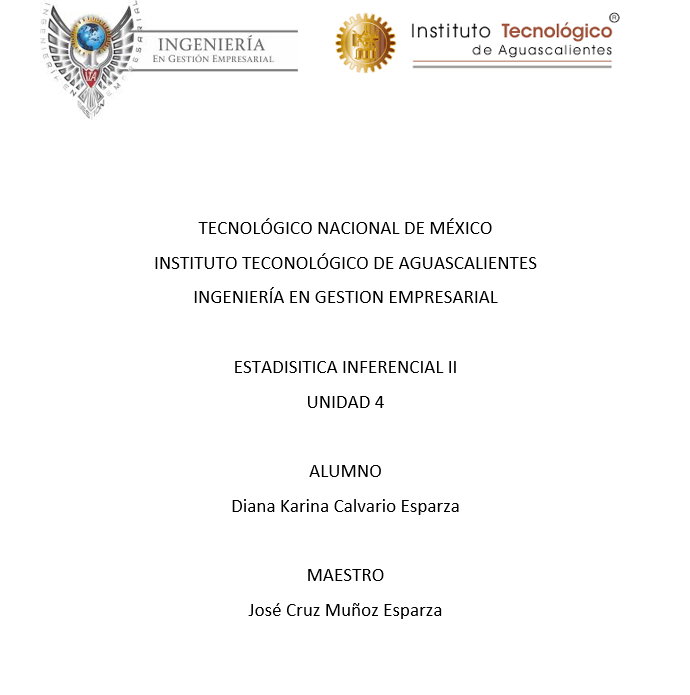

##Introducción

El presente proyecto tiene como finalidad analizar los factores químicos que influyen en la calidad del vino tinto, utilizando un enfoque estadístico basado en datos reales del conjunto winequality-red.csv. A diferencia del análisis anterior, en este estudio se incorporan múltiples predictores como el nivel de alcohol, sulfatos, acidez fija y ácido cítrico para modelar y explicar la calidad del vino, que se evalúa como una variable categórica. Se aplican modelos de regresión múltiple, análisis de varianza (ANOVA), y pruebas tukey para identificar las variables con mayor influencia y evaluar la significancia de sus efectos.

##Metodología

Se trabajó con un conjunto de datos de 1,599 vinos tintos, eliminando posibles valores nulos (dropna()).

Se analizaron las siguientes variables predictoras: alcohol, sulphates, citric_acid, fixed_acidity, entre otras.

Se utilizaron histogramas y mapas de calor para estudiar la distribución y relaciones entre variables.

Se observó que alcohol tiene la correlación más alta con quality.

Modelado estadístico:
Se realizaron múltiples análisis ANOVA para ver si las variables cambian significativamente según la calidad del vino.

Posteriormente, se aplicaron modelos de regresión múltiple para predecir quality usando varias combinaciones de predictores:

Modelo 1: alcohol, sulphates, citric_acid → n² = 0.2836

Modelo 2: alcohol, fixed_acidity → n² = 0.2504

Evaluación de supuestos del modelo:

Normalidad (Shapiro-Wilk): Rechazada (valor-p ≈ 0.0000), lo cual indica que los residuos no siguen distribución normal.

Homocedasticidad (Breusch-Pagan): Rechazada (valor-p ≈ 0.0000), hay evidencia de heterocedasticidad.

Comparaciones múltiples (Tukey HSD):

Se aplicaron pruebas de Tukey para evaluar diferencias entre niveles de calidad en variables como alcohol, volatile_acidity, fixed_acidity, entre otras.

Algunas variables, como residual_sugar y pH, no mostraron diferencias significativas en ANOVA.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Dianacalvario/estadisticaverano/refs/heads/main/winequality-red.csv')
df=df.dropna()
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


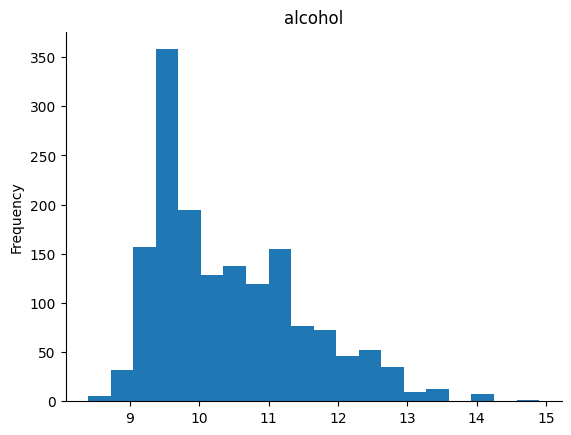

In [ ]:
# @title alcohol

from matplotlib import pyplot as plt
df['alcohol'].plot(kind='hist', bins=20, title='alcohol')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('alcohol~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,483.937982,96.787596,115.854797,1.209895e-104
Residual,1593.0,1330.826555,0.835422,NaN,NaN


##Alcohol

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.3101 0.9231  -0.589 1.2092  False
     3      5  -0.0553    1.0  -0.886 0.7754  False
     3      6   0.6745 0.1883 -0.1566 1.5056  False
     3      7   1.5109    0.0  0.6658 2.3561   True
     3      8   2.1394    0.0  1.1109  3.168   True
     4      5  -0.3654 0.0574 -0.7373 0.0065  False
     4      6   0.3644 0.0597 -0.0084 0.7372  False
     4      7   1.2008    0.0  0.7977 1.6039   True
     4      8   1.8294    0.0  1.1179 2.5408   True
     5      6   0.7298    0.0  0.5861 0.8735   True
     5      7   1.5662    0.0  1.3561 1.7764   True
     5      8   2.1947    0.0   1.572 2.8175   True
     6      7   0.8364    0.0  0.6247 1.0481   True
     6      8   1.4649    0.0  0.8416 2.0882   True
     7      8   0.6285 0.0589 -0.0133 1.2704  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

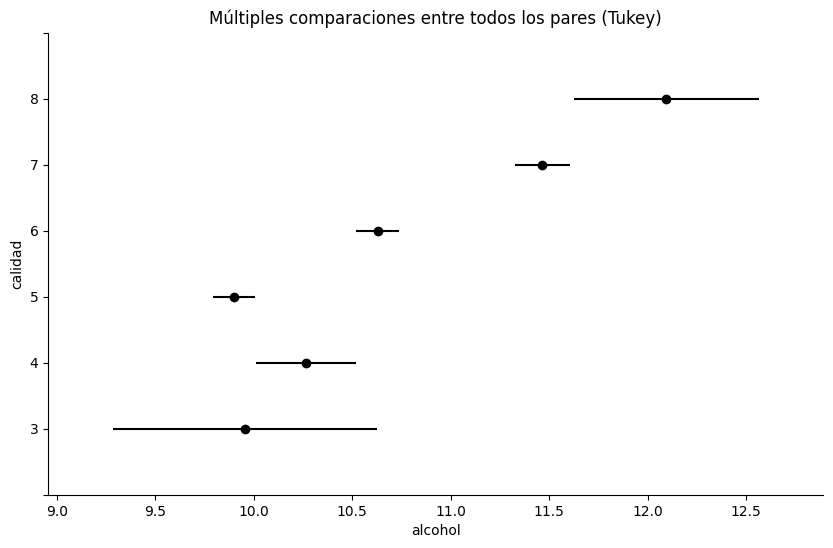

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['alcohol'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="alcohol")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##Fixed acidity

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('fixed_acidity~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,93.684543,18.736909,6.283081,0.000009
Residual,1593.0,4750.518846,2.982121,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4  -0.5808 0.9258 -2.2795  1.118  False
     3      5  -0.1927 0.9993 -1.7622 1.3767  False
     3      6  -0.0128    1.0 -1.5831 1.5574  False
     3      7   0.5124 0.9426 -1.0844 2.1091  False
     3      8   0.2067 0.9997 -1.7366 2.1499  False
     4      5    0.388 0.6149 -0.3146 1.0906  False
     4      6   0.5679 0.1943 -0.1364 1.2723  False
     4      7   1.0931 0.0006  0.3315 1.8547   True
     4      8   0.7874  0.551 -0.5567 2.1316  False
     5      6   0.1799  0.408 -0.0916 0.4514  False
     5      7   0.7051    0.0  0.3081 1.1021   True
     5      8   0.3994 0.9278 -0.7772  1.576  False
     6      7   0.5252 0.0026  0.1251 0.9252   True
     6      8   0.2195 0.9949 -0.9581 1.3971  False
     7      8  -0.3057 0.9796 -1.5184  0.907  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

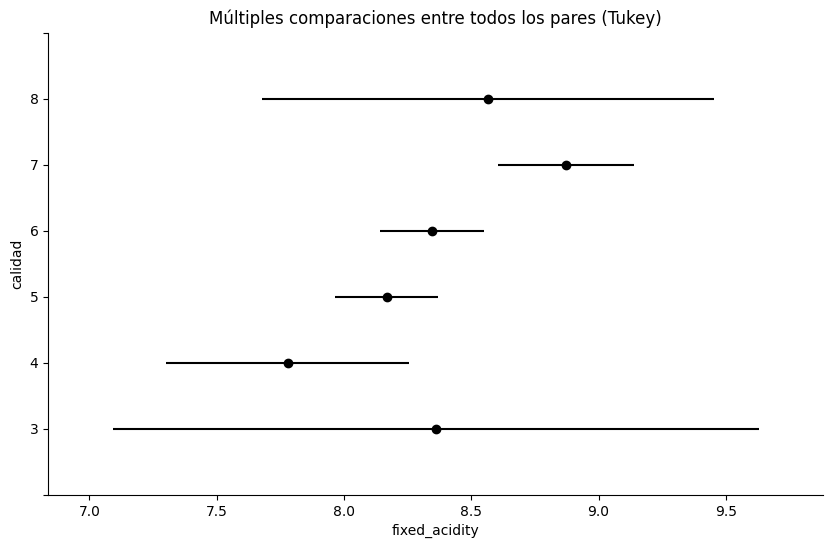

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['fixed_acidity'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="fixed_acidity")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##Volatile acidity

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('volatile_acidity~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,8.223596,1.644719,60.913993,3.326465e-58
Residual,1593.0,43.012083,0.027001,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      4  -0.1905 0.0102 -0.3522 -0.0289   True
     3      5  -0.3075    0.0 -0.4568 -0.1581   True
     3      6   -0.387    0.0 -0.5364 -0.2376   True
     3      7  -0.4806    0.0 -0.6325 -0.3286   True
     3      8  -0.4612    0.0 -0.6461 -0.2763   True
     4      5  -0.1169    0.0 -0.1838 -0.0501   True
     4      6  -0.1965    0.0 -0.2635 -0.1295   True
     4      7    -0.29    0.0 -0.3625 -0.2176   True
     4      8  -0.2706    0.0 -0.3985 -0.1427   True
     5      6  -0.0796    0.0 -0.1054 -0.0537   True
     5      7  -0.1731    0.0 -0.2109 -0.1353   True
     5      8  -0.1537 0.0013 -0.2657 -0.0418   True
     6      7  -0.0936    0.0 -0.1316 -0.0555   True
     6      8  -0.0742 0.4098 -0.1862  0.0379  False
     7      8   0.0194 0.9969  -0.096  0.1348  False
----------------------------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

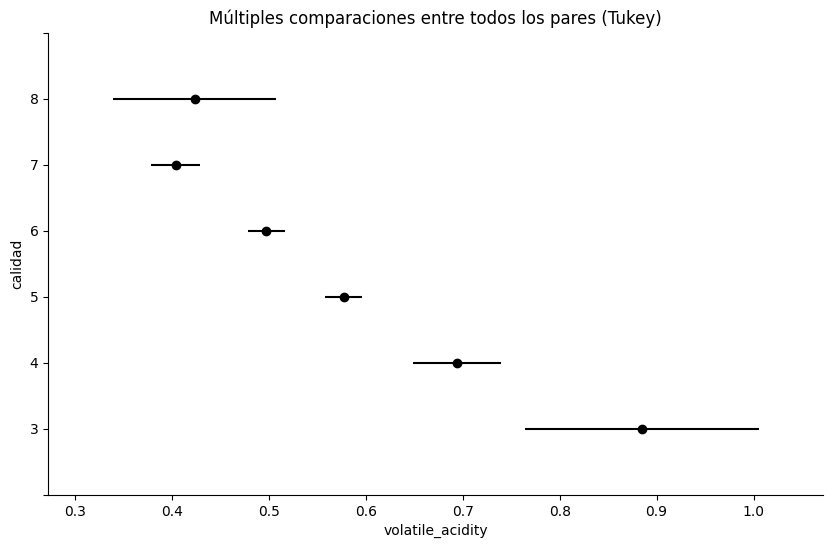

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['volatile_acidity'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="volatile_acidity")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##citric

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('citric_acid~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,3.529638,0.705928,19.690664,4.421092e-19
Residual,1593.0,57.110441,0.035851,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.0032    1.0 -0.1831 0.1894  False
     3      5   0.0727 0.8345 -0.0994 0.2448  False
     3      6   0.1028 0.5293 -0.0693  0.275  False
     3      7   0.2042 0.0115  0.0291 0.3793   True
     3      8   0.2201 0.0382   0.007 0.4332   True
     4      5   0.0695  0.104 -0.0075 0.1466  False
     4      6   0.0997 0.0033  0.0224 0.1769   True
     4      7    0.201    0.0  0.1175 0.2845   True
     4      8    0.217 0.0004  0.0696 0.3643   True
     5      6   0.0301 0.0452  0.0004 0.0599   True
     5      7   0.1315    0.0   0.088  0.175   True
     5      8   0.1474 0.0144  0.0184 0.2764   True
     6      7   0.1014    0.0  0.0575 0.1452   True
     6      8   0.1173 0.0998 -0.0118 0.2464  False
     7      8   0.0159 0.9994  -0.117 0.1489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

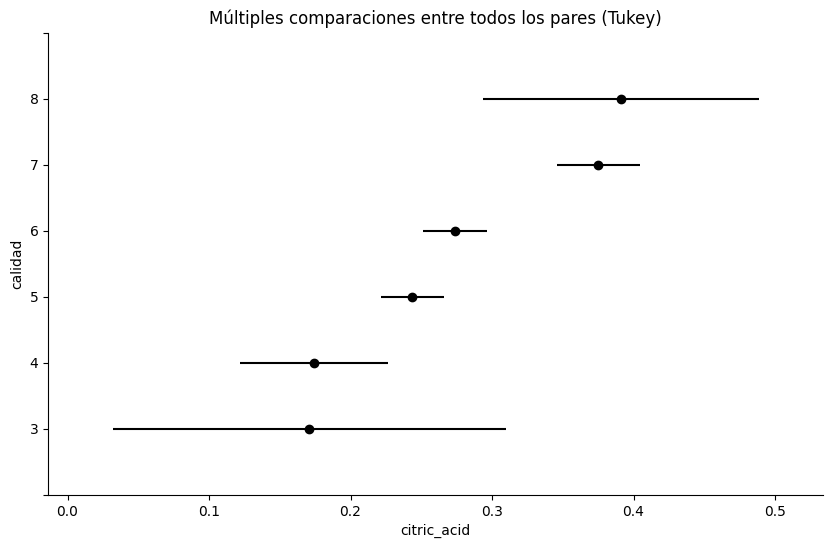

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['citric_acid'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="citric_acid")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##residual_sugar

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('residual_sugar~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,10.468243,2.093649,1.053374,0.384619
Residual,1593.0,3166.191375,1.987565,NaN,NaN


##chorides

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('chlorides~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,0.065812,0.013162,6.035639,0.000015
Residual,1593.0,3.473986,0.002181,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      4  -0.0318 0.3564 -0.0778  0.0141  False
     3      5  -0.0298 0.3421 -0.0722  0.0127  False
     3      6  -0.0375 0.1181   -0.08  0.0049  False
     3      7  -0.0459 0.0295 -0.0891 -0.0027   True
     3      8  -0.0541 0.0396 -0.1066 -0.0015   True
     4      5   0.0021 0.9996 -0.0169  0.0211  False
     4      6  -0.0057 0.9564 -0.0248  0.0133  False
     4      7  -0.0141 0.3707 -0.0347  0.0065  False
     4      8  -0.0222 0.5019 -0.0586  0.0141  False
     5      6  -0.0078 0.0305 -0.0151 -0.0004   True
     5      7  -0.0161 0.0003 -0.0269 -0.0054   True
     5      8  -0.0243 0.2485 -0.0561  0.0075  False
     6      7  -0.0084  0.235 -0.0192  0.0025  False
     6      8  -0.0165 0.6776 -0.0484  0.0153  False
     7      8  -0.0081  0.981 -0.0409  0.0247  False
----------------------------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

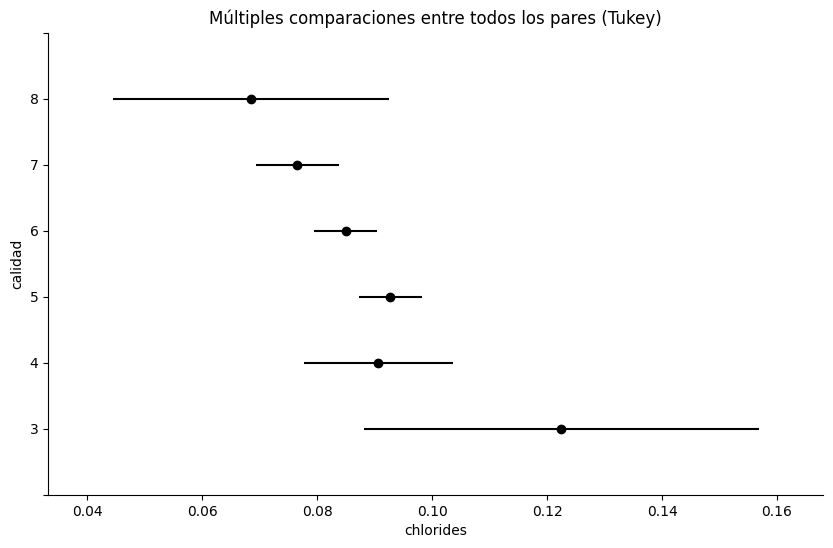

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['chlorides'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="chlorides")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##free sulfur

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('free_sulfur_dioxide~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,2570.721913,514.144383,4.754233,0.000257
Residual,1593.0,172274.262452,108.144546,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     3      4   1.2642 0.9993  -8.9656 11.4939  False
     3      5   5.9838 0.4618  -3.4676 15.4353  False
     3      6   4.7116 0.7139  -4.7444 14.1676  False
     3      7   3.0452 0.9457  -6.5704 12.6609  False
     3      8   2.2778 0.9937  -9.4246 13.9802  False
     4      5   4.7197 0.0186   0.4884  8.9509   True
     4      6   3.4474 0.1869  -0.7941   7.689  False
     4      7   1.7811 0.8782  -2.8053  6.3674  False
     4      8   1.0136 0.9992  -7.0808  9.1081  False
     5      6  -1.2722 0.2288  -2.9071  0.3626  False
     5      7  -2.9386 0.0062  -5.3296 -0.5477   True
     5      8  -3.7061 0.6692 -10.7914  3.3793  False
     6      7  -1.6664 0.3581  -4.0755  0.7427  False
     6      8  -2.4338 0.9246  -9.5253  4.6577  False
     7      8  -0.7674 0.9997  -8.0704  6.5355  False
----------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

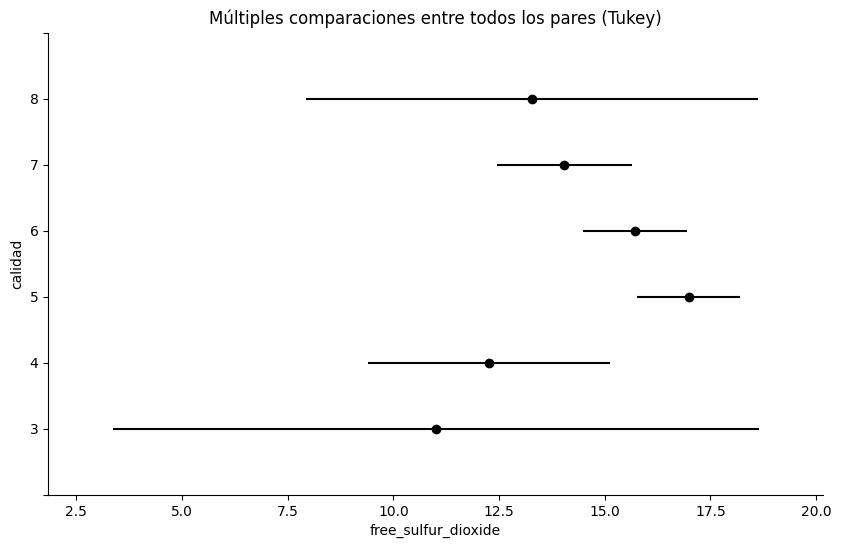

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['free_sulfur_dioxide'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="free_sulfur_dioxide")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##total sulfur

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('total_sulfur_dioxide~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,1.280447e+05,25608.939255,25.47851,8.533598e-25
Residual,1593.0,1.601155e+06,1005.119206,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     3      4  11.3453 0.9051 -19.8415  42.5321  False
     3      5   31.614 0.0219   2.7999   60.428   True
     3      6  15.9699 0.6116 -12.8582   44.798  False
     3      7  10.1201 0.9228 -19.1946  39.4348  False
     3      8   8.5444 0.9838  -27.132  44.2209  False
     4      5  20.2687 0.0001   7.3691  33.1682   True
     4      6   4.6246 0.9112  -8.3063  17.5555  False
     4      7  -1.2252 0.9999 -15.2073   12.757  False
     4      8  -2.8008 0.9995 -27.4779  21.8762  False
     5      6  -15.644    0.0  -20.628 -10.6601   True
     5      7 -21.4938    0.0  -28.783 -14.2047   True
     5      8 -23.0695 0.0283 -44.6702  -1.4688   True
     6      7  -5.8498  0.206 -13.1943   1.4947  False
     6      8  -7.4255 0.9244 -29.0449   14.194  False
     7      8  -1.5757    1.0 -23.8398  20.6885  False
----------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

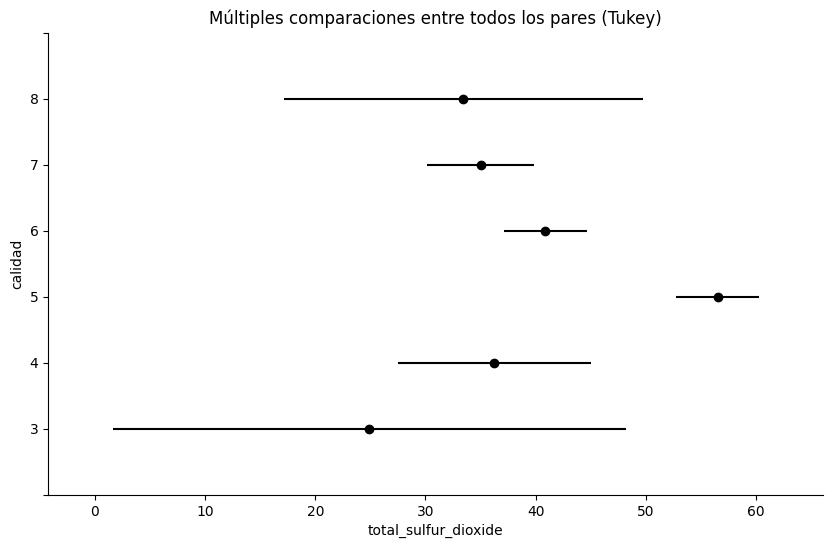

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['total_sulfur_dioxide'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="total_sulfur_dioxide")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##density

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('density~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,0.000230,0.000046,13.396357,8.124395e-13
Residual,1593.0,0.005462,0.000003,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      4  -0.0009 0.7003 -0.0027  0.0009  False
     3      5  -0.0004 0.9903  -0.002  0.0013  False
     3      6  -0.0008 0.7034 -0.0025  0.0008  False
     3      7  -0.0014 0.2088 -0.0031  0.0004  False
     3      8  -0.0023 0.0254 -0.0043 -0.0002   True
     4      5   0.0006 0.2747 -0.0002  0.0013  False
     4      6   0.0001 0.9998 -0.0007  0.0008  False
     4      7  -0.0004 0.6443 -0.0013  0.0004  False
     4      8  -0.0013   0.09 -0.0028  0.0001  False
     5      6  -0.0005    0.0 -0.0008 -0.0002   True
     5      7   -0.001    0.0 -0.0014 -0.0006   True
     5      8  -0.0019 0.0003 -0.0032 -0.0006   True
     6      7  -0.0005 0.0091 -0.0009 -0.0001   True
     6      8  -0.0014 0.0194 -0.0027 -0.0001   True
     7      8  -0.0009 0.3677 -0.0022  0.0004  False
----------------------------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

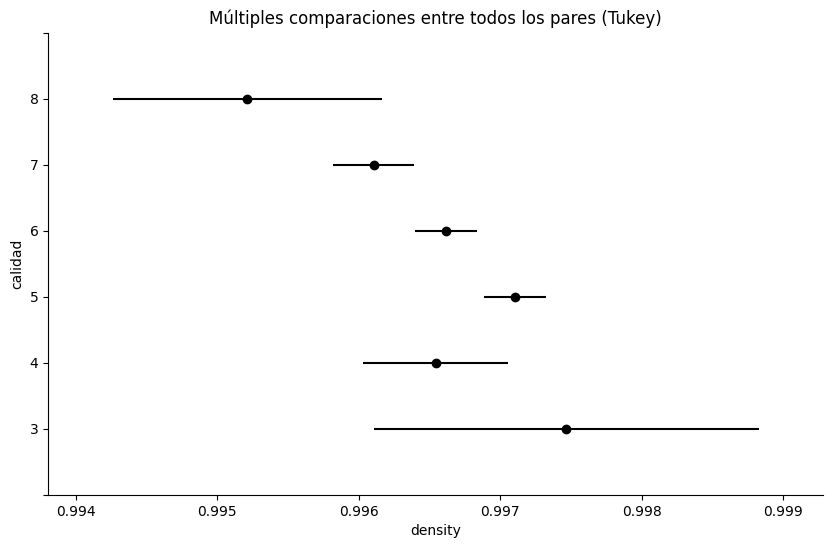

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['density'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="density")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##pH

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('pH~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,0.512079,0.102416,4.341764,0.000628
Residual,1593.0,37.576539,0.023589,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      4  -0.0165 0.9996 -0.1676  0.1346  False
     3      5  -0.0931 0.4012 -0.2326  0.0465  False
     3      6  -0.0799 0.5767 -0.2196  0.0597  False
     3      7  -0.1072 0.2599 -0.2493  0.0348  False
     3      8  -0.1308 0.2578 -0.3036  0.0421  False
     4      5  -0.0766 0.0065 -0.1391 -0.0141   True
     4      6  -0.0634 0.0451 -0.1261 -0.0008   True
     4      7  -0.0908 0.0019 -0.1585  -0.023   True
     4      8  -0.1143 0.0704 -0.2338  0.0053  False
     5      6   0.0131 0.6312  -0.011  0.0373  False
     5      7  -0.0142 0.8616 -0.0495  0.0211  False
     5      8  -0.0377 0.9084 -0.1424  0.0669  False
     6      7  -0.0273 0.2426 -0.0629  0.0083  False
     6      8  -0.0508  0.736 -0.1556  0.0539  False
     7      8  -0.0235 0.9894 -0.1314  0.0843  False
----------------------------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

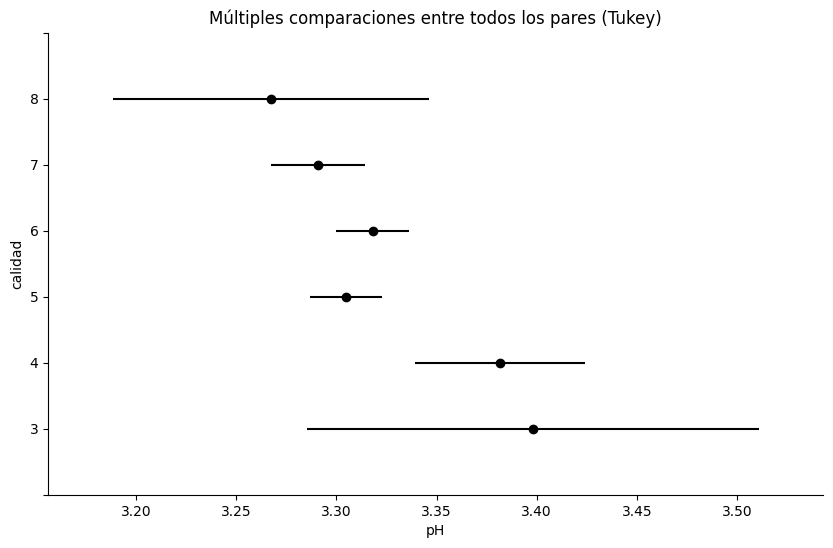

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['pH'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="pH")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##sulphate

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('sulphates~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,3.000163,0.600033,22.273376,1.225890e-21
Residual,1593.0,42.914557,0.026939,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.0264 0.9972  -0.135 0.1879  False
     3      5    0.051 0.9259 -0.0982 0.2001  False
     3      6   0.1053 0.3349 -0.0439 0.2546  False
     3      7   0.1713 0.0165  0.0195  0.323   True
     3      8   0.1978 0.0277  0.0131 0.3825   True
     4      5   0.0246 0.9011 -0.0422 0.0913  False
     4      6   0.0789 0.0102   0.012 0.1459   True
     4      7   0.1448    0.0  0.0725 0.2172   True
     4      8   0.1714 0.0019  0.0436 0.2991   True
     5      6   0.0544    0.0  0.0286 0.0802   True
     5      7   0.1203    0.0  0.0826  0.158   True
     5      8   0.1468 0.0026   0.035 0.2586   True
     6      7   0.0659    0.0  0.0279  0.104   True
     6      8   0.0924 0.1724 -0.0195 0.2044  False
     7      8   0.0265 0.9865 -0.0887 0.1418  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

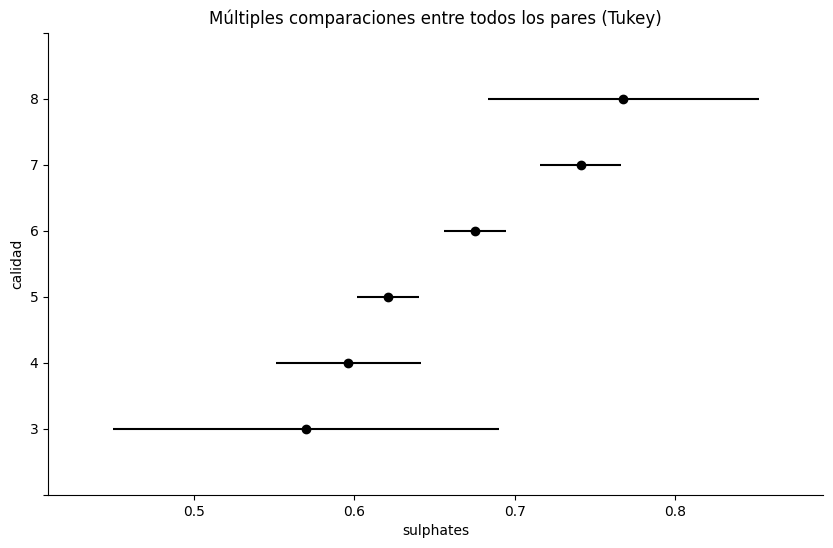

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['sulphates'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad", xlabel="sulphates")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##mapa de calor

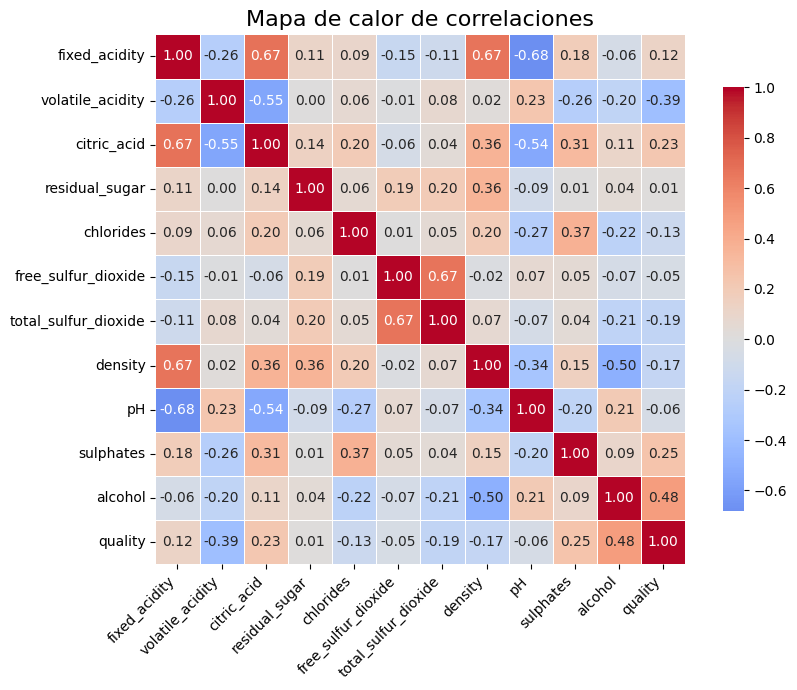

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
matriz_correlacion = df.corr(numeric_only=True)

# Abre una ventana gráfica
plt.figure(figsize=(9,7), dpi = 100)

# Crea un mápa de calor
sns.heatmap(
    matriz_correlacion,
    annot=True,  # Activa las anotaciones numéricas dentro de cada celda
    fmt=".2f",  #Formato para los números dentro de las celdas (cuando annot=True):
    cmap="coolwarm", # paleta de colores: "coolwarm", "bwr", "seismic", "RdBu", "PuOr", "BrBG", "PiYG", etc.
    center=0,  # Se fija un valor intermedio, dado que r va desde -1 a 1
    square=True,  # Se forza el cuadrado de cada celda
    linewidths=0.5, # Grosor del borde de la celda
    cbar_kws={"shrink": 0.8},  #Ajusta opciones de la barra de color (colorbar) que aparece al lado derecho
    )

plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# plt.show()


Coeficiente de determinación:  0.2836

Intervalo de confianza para b1 de  95%
 0.3067 < b1 <  0.3702

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
alcohol,1.0,236.294646,236.294646,504.824454,2.343540e-97
sulphates,1.0,44.976586,44.976586,96.088849,4.547362e-22
citric_acid,1.0,14.317595,14.317595,30.588387,3.721743e-08
Residual,1595.0,746.576276,0.468073,NaN,NaN


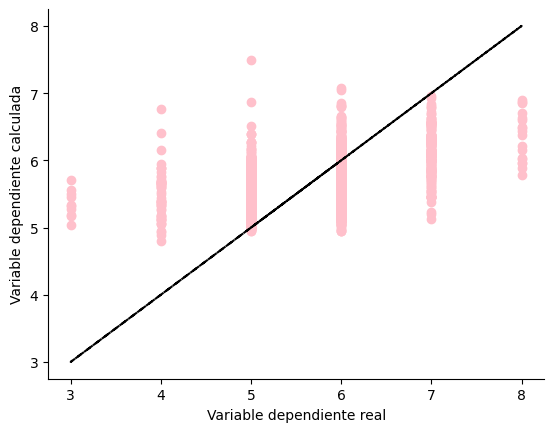

In [ ]:
x = df[["alcohol", "sulphates", "citric_acid"]]
y = df["quality"]


# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'pink')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('quality~alcohol + sulphates +citric_acid', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


Coeficiente de determinación:  0.2504

Intervalo de confianza para b1 de  95%
 0.3358 < b1 <  0.4003

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
alcohol,1.0,236.294646,236.294646,482.722885,1.084102e-93
fixed_acidity,1.0,24.622526,24.622526,50.301000,1.974505e-12
Residual,1596.0,781.247931,0.489504,NaN,NaN


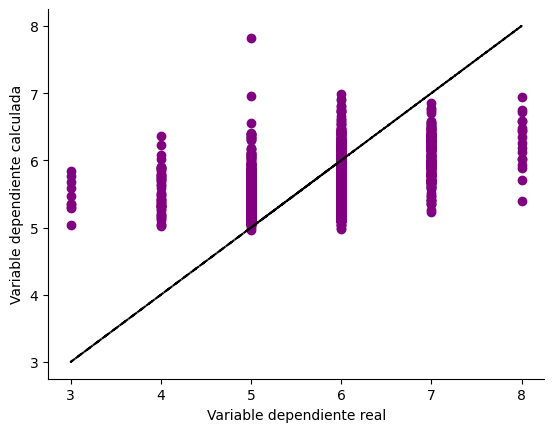

In [ ]:
x = df[["alcohol", "fixed_acidity"]]
y = df["quality"]

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'purple')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('quality~ alcohol + fixed_acidity', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

In [ ]:
#Las variables alcohol, sulphates y citric_acid presentan efectos estadísticamente significativos sobre la calidad del vino, con valores p menores a 0.001.
#El modelo de regresión con estas tres variables explicó un 28.4% de la varianza total en la calidad del vino (n² = 0.2836), lo cual se considera moderado en estudios con datos reales.
#El análisis ANOVA mostró que muchas variables químicas, como volatile_acidity, también varían significativamente según la calidad.
#Las pruebas de Tukey identificaron diferencias relevantes entre niveles de calidad para la mayoría de las variables, excepto residual_sugar y pH.

En este segundo análisis se buscó entender de manera más completa qué variables químicas del vino tinto están relacionadas con su calidad. A diferencia del primer análisis, que solo consideró el alcohol, aquí se evaluaron varias variables al mismo tiempo como: alcohol, sulphates, citric acid y acidez fija, utilizando un modelo de regresión múltiple y diferentes pruebas estadísticas.

Primero, se aplicaron análisis ANOVA para cada variable, lo que permitió ver si sus valores cambiaban según la calidad del vino. Se encontró que muchas de ellas, como el alcohol, el ácido cítrico, y los sulphates, sí presentan diferencias significativas entre niveles de calidad. Luego, se utilizó la prueba de Tukey para comparar los grupos uno a uno y confirmar cuáles calidades eran realmente diferentes entre sí.

Después, se construyeron dos modelos de regresión múltiple:

Uno con alcohol, sulphates y citric_acid, que explicó un 28.4% de la calidad del vino.

Otro con alcohol y acidez fija, que explicó un 25% de la calidad.

Esto indica que aunque estas variables influyen, todavía hay otros factores (como el tipo de uva o el proceso de fermentación) que también afectan la calidad y que no están en el modelo.

Además, se hicieron pruebas para verificar si el modelo cumplía con los supuestos teóricos. Los resultados mostraron que los residuos no son normales (según Shapiro-Wilk) y hay heterocedasticidad (según Breusch-Pagan), lo cual sugiere que los modelos tienen algunas limitaciones.
